In [52]:
import pickle
with open('./data/cleaned_df.pickle', 'rb') as file:
    df = pickle.load(file)
    

In [53]:
import pandas as pd
import numpy as np
import itertools

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from imblearn.over_sampling import SMOTE, ADASYN

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Preview the class imbalance

In [54]:
# Count the number of fraudulent/infraudulent purchases
df['default_next_month'].value_counts(normalize=True)

0    0.778594
1    0.221406
Name: default_next_month, dtype: float64

## Define the predictor and target variables

In [55]:
# Your code here
y = df['default_next_month']
X = df.drop(columns=['default_next_month'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

Find the class imbalance in the training and test sets: 

In [56]:
# Training set
print(y_train.value_counts(normalize=True))
print('\n')
# Test set
print(y_test.value_counts(normalize=True))

0    0.777629
1    0.222371
Name: default_next_month, dtype: float64


0    0.781488
1    0.218512
Name: default_next_month, dtype: float64


## Create an initial model

AUC: 0.7525631419868879


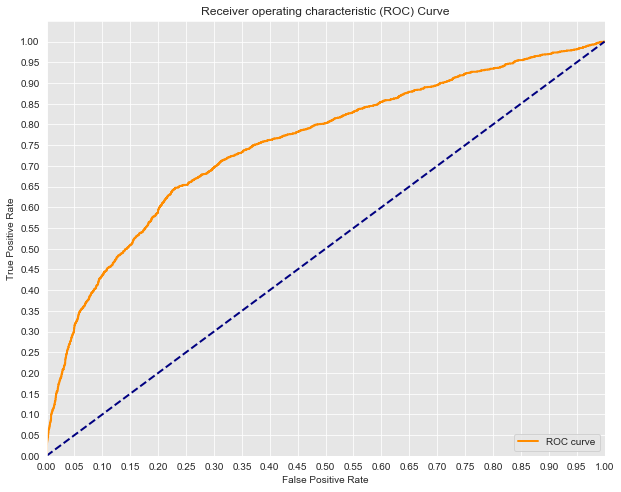

In [57]:
# Initial Model
logreg = LogisticRegression(fit_intercept=False, solver='liblinear')

# Probability scores for test set
y_score = logreg.fit(X_train, y_train).decision_function(X_test)
# False positive rate and true positive rate
fpr, tpr, thresholds = roc_curve(y_test, y_score)

# Seaborn's beautiful styling
sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

# Print AUC
print('AUC: {}'.format(auc(fpr, tpr)))

# Plot the ROC curve
plt.figure(figsize=(10, 8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [58]:
# Plot a confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    #Add Normalization Option
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print('Normalized confusion matrix')
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment='center',
                 color='white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[5618 1202]
 [ 233  434]]


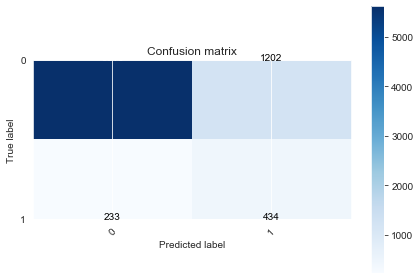

In [59]:
# Plot confusion matrix of the test set 
y_hat_test = logreg.predict(X_test)
cnf_matrix = confusion_matrix(y_hat_test, y_test)
plot_confusion_matrix(cnf_matrix, classes=[0, 1])

## Tune the model 

LogisticRegression(C=0.001, fit_intercept=False, solver='liblinear')
AUC for 0.001: 0.7417575162166917
-------------------------------------------------------
LogisticRegression(C=0.01, fit_intercept=False, solver='liblinear')
AUC for 0.01: 0.7483958815892128
-------------------------------------------------------
LogisticRegression(C=0.1, fit_intercept=False, solver='liblinear')
AUC for 0.1: 0.7520543789350784
-------------------------------------------------------
LogisticRegression(C=1, fit_intercept=False, solver='liblinear')
AUC for 1: 0.7525631419868879
-------------------------------------------------------
LogisticRegression(C=10, fit_intercept=False, solver='liblinear')
AUC for 10: 0.7526497466213745
-------------------------------------------------------
LogisticRegression(C=100, fit_intercept=False, solver='liblinear')
AUC for 100: 0.7526240472967863
-------------------------------------------------------


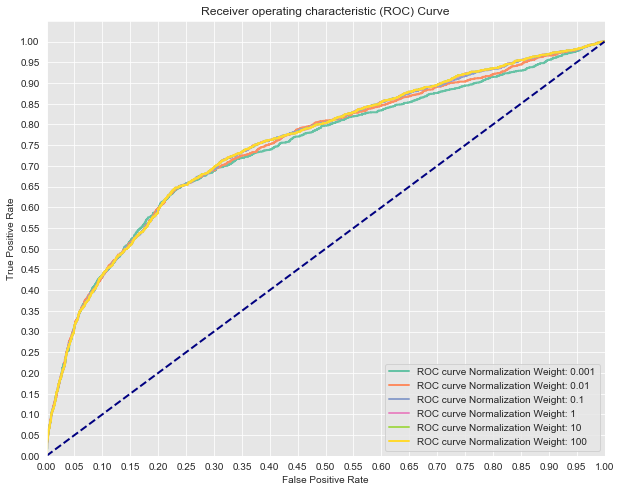

In [60]:

# Now let's compare a few different regularization performances on the dataset:
C_param_range = [0.001, 0.01, 0.1, 1, 10, 100]
names = [0.001, 0.01, 0.1, 1, 10, 100]
colors = sns.color_palette('Set2')

plt.figure(figsize=(10, 8))

for n, c in enumerate(C_param_range):
    # Fit a model
    logreg = LogisticRegression(fit_intercept=False, C=c, solver='liblinear')
    model_log = logreg.fit(X_train, y_train)
    print(model_log) # Preview model params

    # Predict
    y_hat_test = logreg.predict(X_test)

    y_score = logreg.fit(X_train, y_train).decision_function(X_test)

    fpr, tpr, thresholds = roc_curve(y_test, y_score)
    
    print('AUC for {}: {}'.format(names[n], auc(fpr, tpr)))
    print('-------------------------------------------------------')
    lw = 2
    plt.plot(fpr, tpr, color=colors[n],
             lw=lw, label='ROC curve Normalization Weight: {}'.format(names[n]))

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [61]:
# Previous original class distribution
print(y_train.value_counts()) 

# Fit SMOTE to training data
X_train_resampled, y_train_resampled = SMOTE().fit_sample(X_train, y_train) 

# Preview synthetic sample class distribution
print('\n')
print(pd.Series(y_train_resampled).value_counts())

0    17464
1     4994
Name: default_next_month, dtype: int64


C:\Users\Neel\Anaconda3\envs\learn-env\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)




1    17464
0    17464
dtype: int64


LogisticRegression(C=0.005, fit_intercept=False, solver='liblinear')
AUC for 0.005: 0.7452176273129915
-------------------------------------------------------
LogisticRegression(C=0.1, fit_intercept=False, solver='liblinear')
AUC for 0.1: 0.7537189847805674
-------------------------------------------------------
LogisticRegression(C=0.2, fit_intercept=False, solver='liblinear')
AUC for 0.2: 0.7539738886504679
-------------------------------------------------------
LogisticRegression(C=0.5, fit_intercept=False, solver='liblinear')
AUC for 0.5: 0.7541524258281974
-------------------------------------------------------
LogisticRegression(C=1, fit_intercept=False, solver='liblinear')
AUC for 1: 0.7542069585413481
-------------------------------------------------------
LogisticRegression(C=2, fit_intercept=False, solver='liblinear')
AUC for 2: 0.7542160473268733
-------------------------------------------------------
LogisticRegression(C=5, fit_intercept=False, solver='liblinear')
AUC for 5

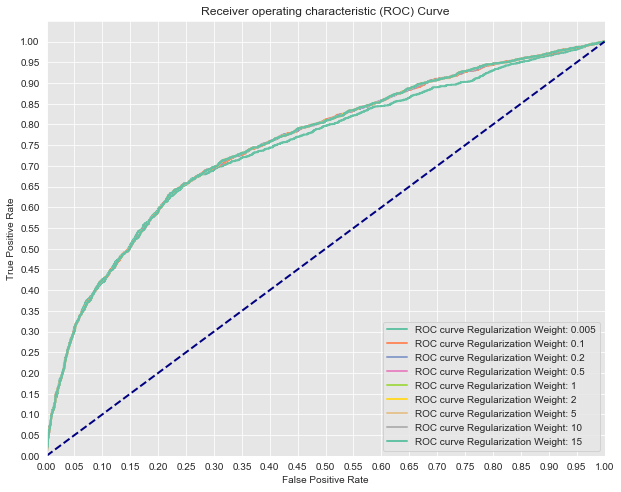

In [62]:
# Now let's compare a few different regularization performances on the dataset
# C_param_range = [0.005, 0.1, 0.2, 0.5, 0.8, 1, 1.25, 1.5, 2]
# names = [0.005, 0.1, 0.2, 0.5, 0.8, 1, 1.25, 1.5, 2]
C_param_range = [0.005, 0.1, 0.2, 0.5, 1, 2, 5, 10, 15]
names =[0.005, 0.1, 0.2, 0.5, 1, 2, 5, 10, 15]
colors = sns.color_palette('Set2', n_colors=len(names))

plt.figure(figsize=(10, 8))

for n, c in enumerate(C_param_range):
    # Fit a model
    logreg = LogisticRegression(fit_intercept=False, C=c, solver='liblinear')
    model_log = logreg.fit(X_train_resampled, y_train_resampled)
    print(model_log) # Preview model params

    # Predict
    y_hat_test = logreg.predict(X_test)

    y_score = logreg.fit(X_train_resampled, y_train_resampled).decision_function(X_test)

    fpr, tpr, thresholds = roc_curve(y_test, y_score)
    
    print('AUC for {}: {}'.format(names[n], auc(fpr, tpr)))
    print('-------------------------------------------------------')
    
    lw = 2
    plt.plot(fpr, tpr, color=colors[n],
             lw=lw, label='ROC curve Regularization Weight: {}'.format(names[n]))

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [63]:
#print(confusion_matrix(y_test, y_hat_test))
print(classification_report(y_test, y_hat_test))

              precision    recall  f1-score   support

           0       0.88      0.78      0.83      5851
           1       0.45      0.63      0.52      1636

    accuracy                           0.75      7487
   macro avg       0.66      0.70      0.67      7487
weighted avg       0.79      0.75      0.76      7487



In [64]:
print("F1 Score: {}".format(f1_score(y_test,y_hat_test)))

F1 Score: 0.5208333333333333
